In [11]:
import pandas as pd
import numpy as np
import holidays_co as hd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")
from math import sqrt

In [2]:
FIG_SIZE = (18,10)
FONT_SIZE = 12
PERCENT_TRAIN = 0.95
SIZE_TITLE = 18

In [3]:
df=pd.read_csv('medellin.csv',sep=';')#,parse_dates=['Fecha'],index_col=['Fecha'])
df=df.dropna()
df

,fecha,servicios
0,1/04/2020,906
1,2/04/2020,1013
2,3/04/2020,1063
3,4/04/2020,953
4,5/04/2020,975
...,...,...
388,24/04/2021,1241
389,25/04/2021,1253
390,26/04/2021,1294
391,27/04/2021,1189


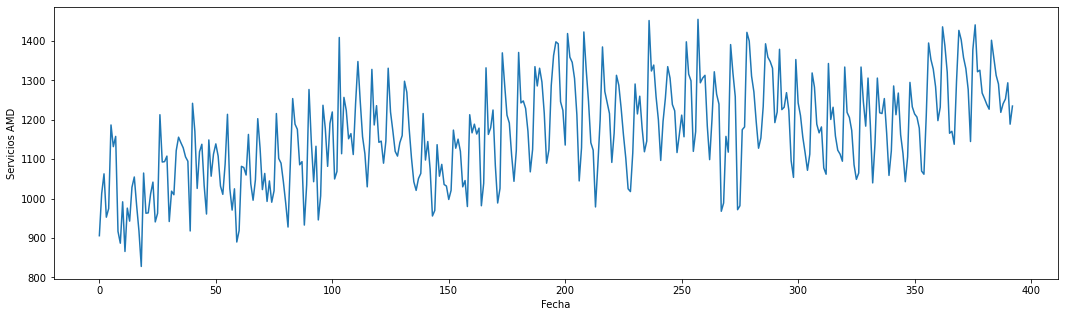

In [4]:
plt.figure(figsize=(18, 5))
plt.xlabel('Fecha')
plt.ylabel('Servicios AMD')
plt.plot(df['servicios'])

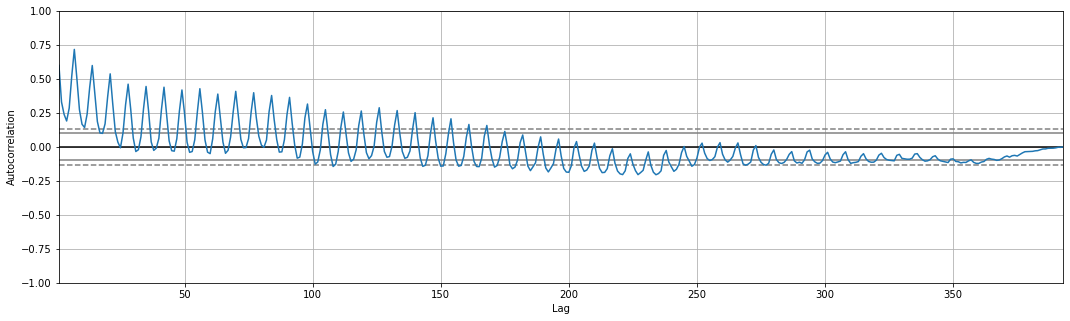

In [5]:
plt.figure(figsize=(18,5))
autocorrelation_plot(df['servicios'])
plt.show()

p: 10
Mean absolute error: 60.88
Mean squared error: 6113.96
Variance score: 0.61


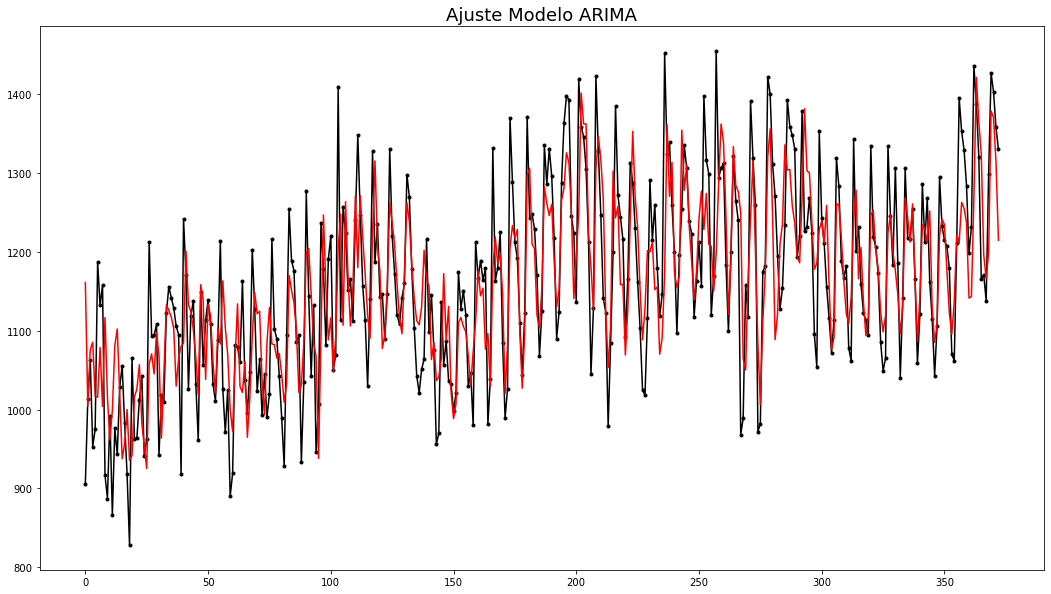

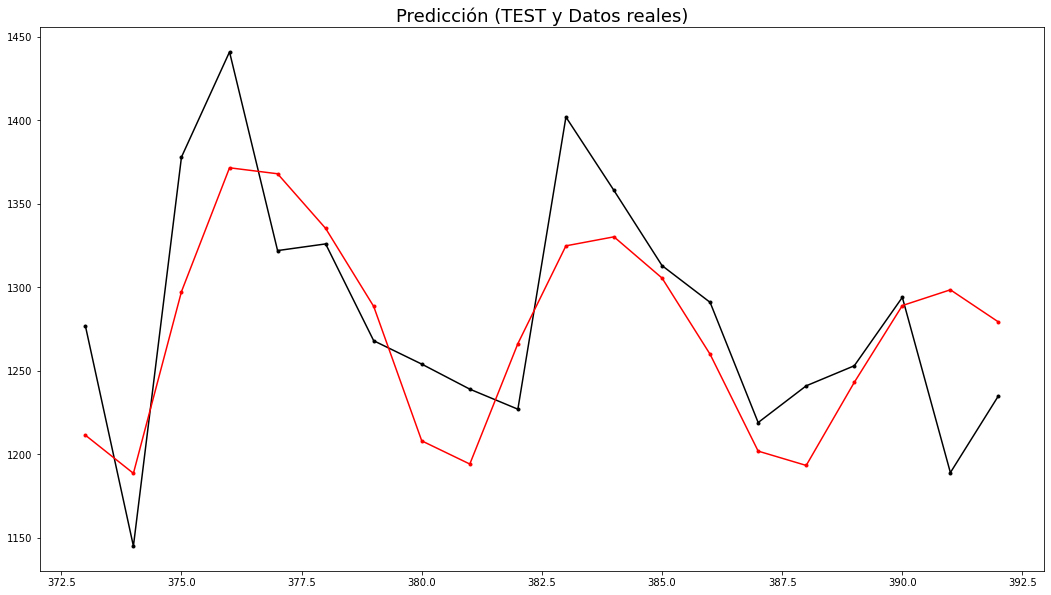

In [14]:
def model_arima(df, p_value):
    #Grafia de datos y tendencia
    #ciclo, tend = sm.tsa.filters.hpfilter(df["servicios"])
    #df['tend'] = tend
    #df[["servicios","tend"]].plot(figsize=FIG_SIZE,fontsize=FONT_SIZE)
    #legend = plt.legend()
    #legend.prop.set_size(14);
    
    #Separación datos de entrenamiento y test
    size = int(len(df)*PERCENT_TRAIN)
    df_train, df_test=df[0:size],df[size:len(df)]

    #Entrenamiento del modelo
    modelo = ARIMA(df_train["servicios"], order=(int(p_value), 0, 1))  
    resultados = modelo.fit()

    #Muestra de errores y resumen
    #residuals = pd.DataFrame(resultados.resid) #Errores residuales, puede haber información de tendencia que el modelo aun no captura
    #residuals.plot(figsize=FIG_SIZE,fontsize=FONT_SIZE) 
    #plt.show()
    #residuals.plot(kind='kde',figsize=FIG_SIZE,fontsize=FONT_SIZE) #densidad de valores de error residual, sugiere errores gaussianos
    #plt.show()
    #print(residuals.describe())
    #print(resultados.summary())
    
    df_train['pronostico'] = resultados.fittedvalues  
    df_train=df_train.dropna()
    plt.figure(figsize=FIG_SIZE)
    plt.title("Ajuste Modelo ARIMA", fontdict=None, size=SIZE_TITLE)
    plt.plot(df_train['servicios'],'.-k')
    plt.plot(df_train['pronostico'],'-r')
    
    print("Mean absolute error: %.2f" % mean_absolute_error(df_train['servicios'], df_train['pronostico']))
    print("Mean squared error: %.2f" % mean_squared_error(df_train['servicios'], df_train['pronostico']))# MSE
    print("Variance score: %.2f" % r2_score(df_train['servicios'], df_train['pronostico'])) # R2
    #df_train[['servicios', 'pronostico']].plot(figsize=FIG_SIZE,fontsize=FONT_SIZE, title="Modelo ARIMA")
    #plt.legend().prop.set_size(14);
    
    #Predicción
    
    df_test['prediction'] = resultados.predict(len(df_train),len(df)-1)
    #rmse= sqrt(mean_squared_error(df_test['servicios'],df_test['prediction']))
    #print(rmse)
    
    plt.figure(figsize=FIG_SIZE)
    plt.title("Predicción (TEST y Datos reales)", fontdict=None, size=SIZE_TITLE)
    plt.plot(df_test['servicios'],'.-k')
    plt.plot(df_test['prediction'],'.-r')

    #Se imprime la predicción con los datos de test
    #df_test[['servicios','prediction']].plot(figsize=FIG_SIZE,fontsize=FONT_SIZE)
    
model_arima(df,input("p: "))

In [25]:
df

,fecha,servicios,tend
0,1/04/2020,906,1007.953022
1,2/04/2020,1013,1006.867398
2,3/04/2020,1063,1005.718054
3,4/04/2020,953,1004.445101
4,5/04/2020,975,1003.024453
...,...,...,...
388,24/04/2021,1241,1268.282665
389,25/04/2021,1253,1263.150466
390,26/04/2021,1294,1257.937978
391,27/04/2021,1189,1252.670203


In [ ]:
def model_arima(df, p_value, q_value):
    #Grafia de datos y tendencia
    ciclo, tend = sm.tsa.filters.hpfilter(df["servicios"])
    df['tend'] = tend
    df[["servicios","tend"]].plot(figsize=FIG_SIZE,fontsize=FONT_SIZE)
    legend = plt.legend()
    legend.prop.set_size(14);
    
    #Separación datos de entrenamiento y test
    size = int(len(df)*PERCENT_TRAIN)
    df_train, df_test=df[0:size],df[size:len(df)]

    #Entrenamiento del modelo
    modelo = sm.tsa.ARIMA(df_train["servicios"], order=(int(p_value), 0, int(q_value)))  
    resultados = modelo.fit(disp=-1)

    #Muestra de errores y resumen
    residuals = pd.DataFrame(resultados.resid) #Errores residuales, puede haber información de tendencia que el modelo aun no captura
    residuals.plot(figsize=FIG_SIZE,fontsize=FONT_SIZE) 
    plt.show()
    residuals.plot(kind='kde',figsize=FIG_SIZE,fontsize=FONT_SIZE) #densidad de valores de error residual, sugiere errores gaussianos
    plt.show()
    print(residuals.describe())
    print(resultados.summary())
    df_train['pronostico'] = resultados.fittedvalues  
    df_train=df_train.dropna()
    df_train[['servicios', 'pronostico']].plot(figsize=FIG_SIZE,fontsize=FONT_SIZE)
    plt.legend().prop.set_size(14);

    df_test['prediction'] = resultados.predict(len(df_train),len(df)-1)
    rmse= sqrt(mean_squared_error(df_test['servicios'],df_test['prediction']))
    print(rmse)

    #Se imprime la predicción con los datos de test
    df_test[['servicios','prediction']].plot(figsize=FIG_SIZE,fontsize=FONT_SIZE)